In [38]:
curr_dir = f'/user_data/csimmon2/git_repos/ptoc'

import sys
sys.path.insert(0,curr_dir)
import matplotlib.pyplot as plt

import itertools
from nilearn import image, plotting, datasets
from nilearn.datasets import load_mni152_brain_mask, load_mni152_template
import nibabel as nib
import pdb
import os
import ptoc_params  as params
import seaborn as sns

#hide warning
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#I need to figure out how to call the masked version of controls to compare to patients

# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

# Calculate the average of sum_selec_norm by group and hemi
group_hemi_means = data.groupby(['group', 'hemi'])['sum_selec_norm'].mean().unstack()
group_hemi_errors = data.groupby(['group', 'hemi'])['sum_selec_norm'].sem().unstack()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(4, 6))

# Plot bar chart with error bars
x = np.arange(len(group_hemi_means.columns))
bar_width = 0.2

for i, group in enumerate(group_hemi_means.index):
    plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)

# Set x-axis tick labels
plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups and Hemisphere by Average sum_selec_norm')

# Add legend
plt.legend()

# Show the plot
plt.show()


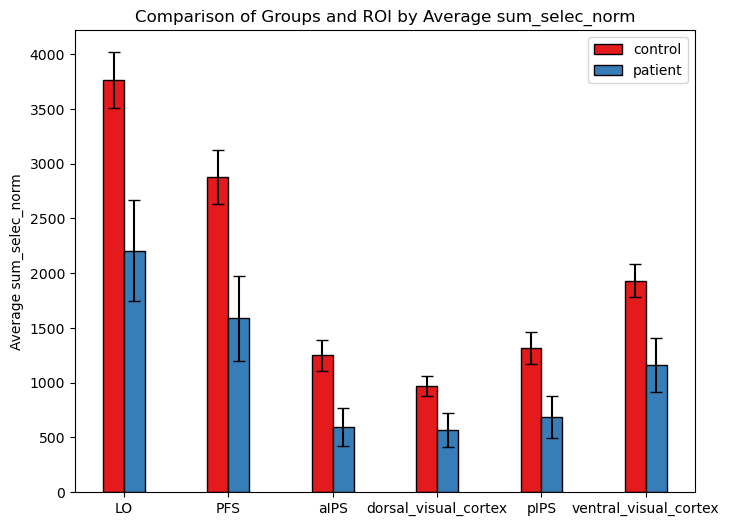

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

# Calculate the average of sum_selec_norm by group and roi
group_roi_means = data.groupby(['group', 'roi'])['sum_selec_norm'].mean().unstack()
group_roi_errors = data.groupby(['group', 'roi'])['sum_selec_norm'].sem().unstack()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(8, 6))

# Plot bar chart with error bars
x = np.arange(len(group_roi_means.columns))
bar_width = 0.2

for i, group in enumerate(group_roi_means.index):
    plt.bar(x + i * bar_width, group_roi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_roi_errors.loc[group], capsize=4, label=group)

# Set x-axis tick labels
plt.xticks(x + (len(group_roi_means.index) - 1) * bar_width / 2, group_roi_means.columns)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups and ROI by Average sum_selec_norm')

# Add legend
plt.legend()

# Show the plot
plt.show()


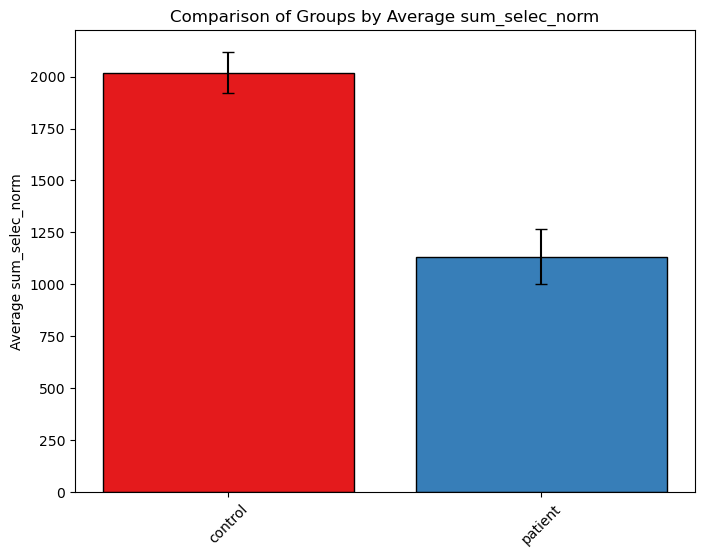

In [44]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the average of sum_selec_norm by group
group_means = data.groupby('group')['sum_selec_norm'].mean()

# Calculate the standard error of sum_selec_norm by group
group_errors = data.groupby('group')['sum_selec_norm'].sem()

# Set color palette
palette = sns.color_palette('Set1')

# Set figure size
plt.figure(figsize=(8, 6))

# Plot bar chart with error bars
plt.bar(group_means.index, group_means, color=palette, edgecolor='black', yerr=group_errors, capsize=4)

# Set x-axis tick labels
plt.xticks(rotation=45)

# Set y-axis label
plt.ylabel('Average sum_selec_norm')

# Set plot title
plt.title('Comparison of Groups by Average sum_selec_norm')

# Show the plot
plt.show()


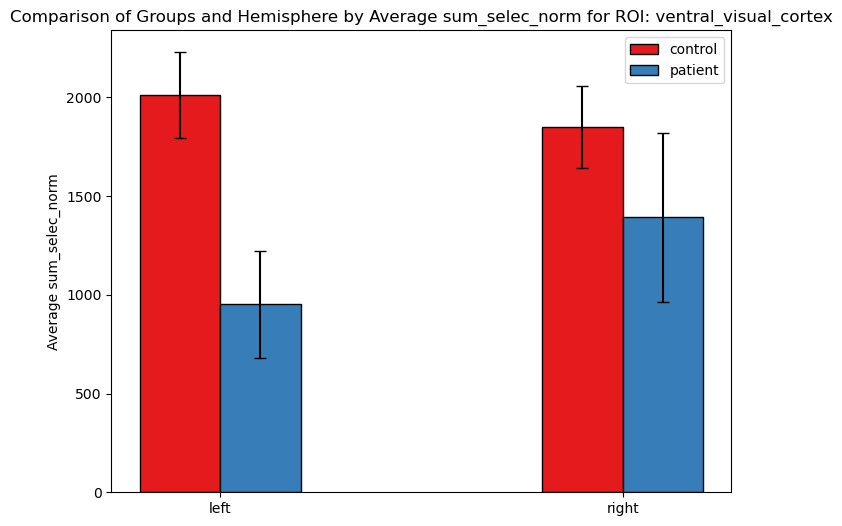

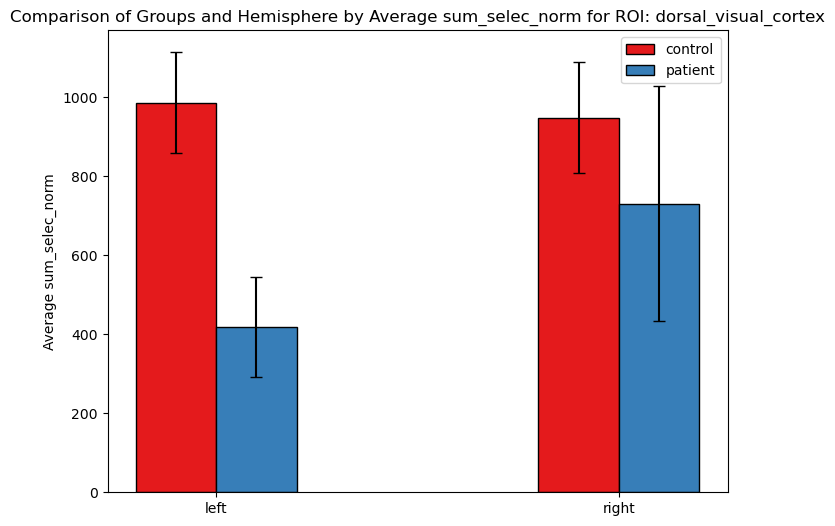

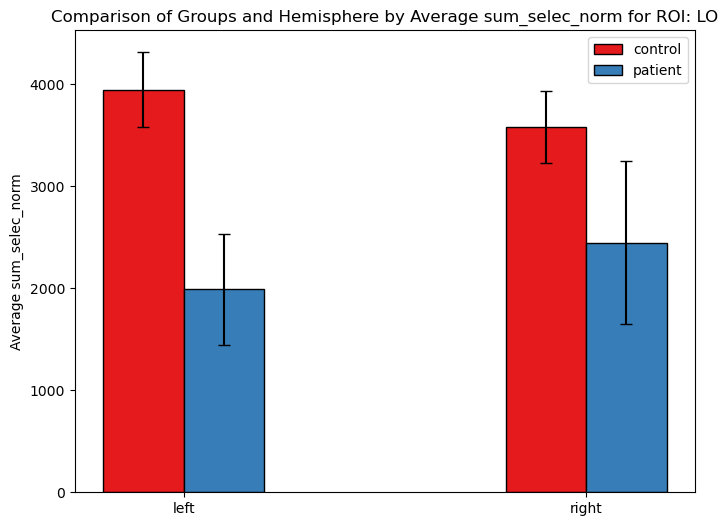

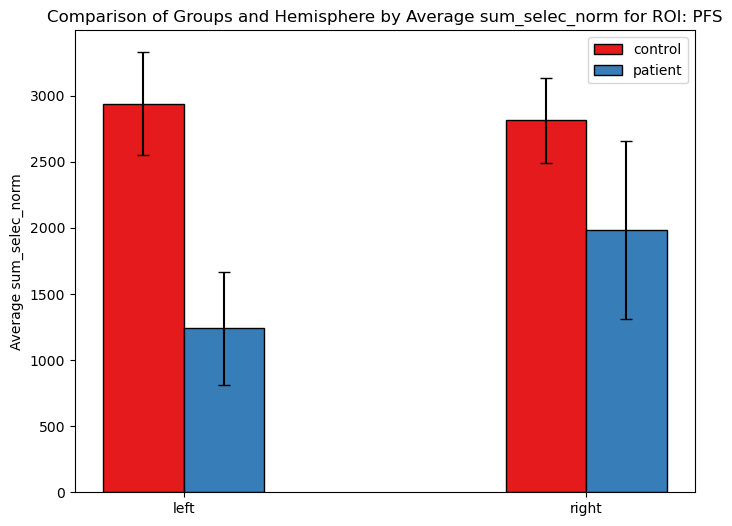

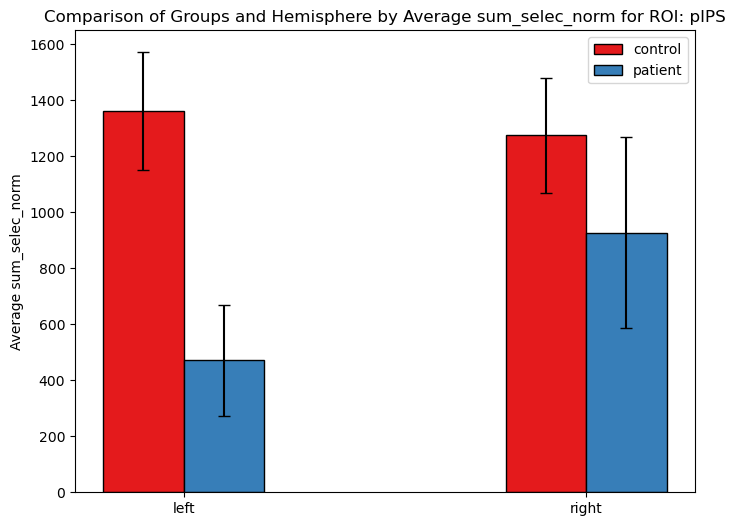

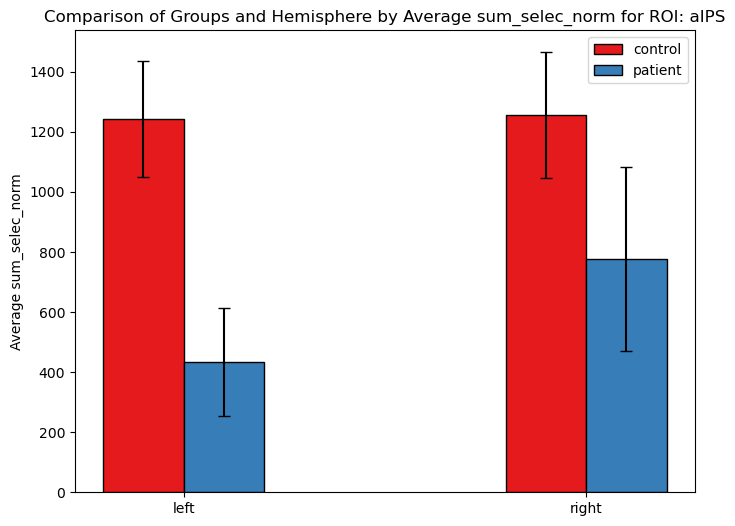

In [45]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Iterate through ROIs
for roi in rois:
    # Filter data for the current ROI
    roi_data = data[data['roi'] == roi]
    
    # Calculate the average of sum_selec_norm by group and hemi
    group_hemi_means = roi_data.groupby(['group', 'hemi'])['sum_selec_norm'].mean().unstack()
    group_hemi_errors = roi_data.groupby(['group', 'hemi'])['sum_selec_norm'].sem().unstack()
    
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Plot bar chart with error bars
    x = np.arange(len(group_hemi_means.columns))
    bar_width = 0.2
    
    for i, group in enumerate(group_hemi_means.index):
        plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)
    
    # Set x-axis tick labels
    plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Comparison of Groups and Hemisphere by Average sum_selec_norm for ROI: {roi}')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()



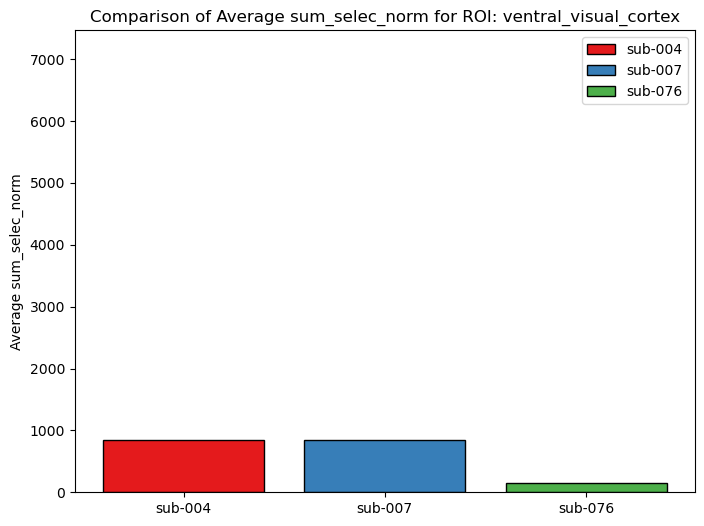

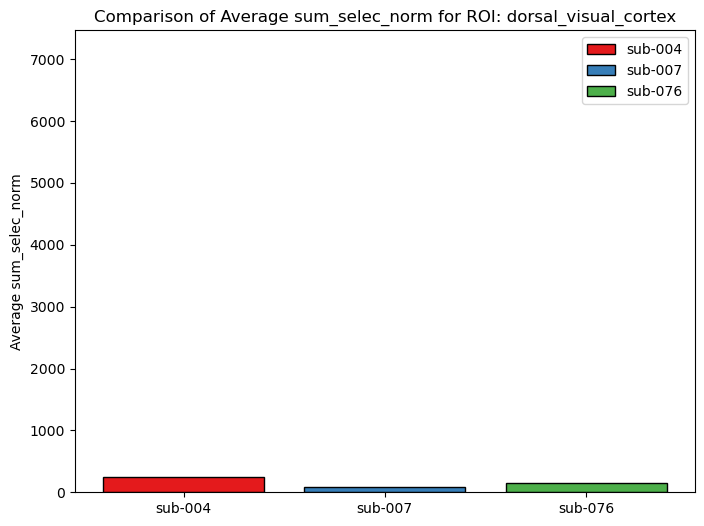

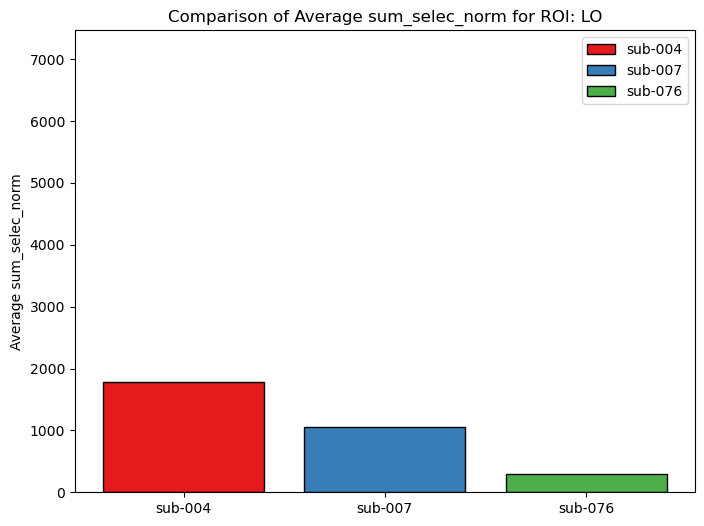

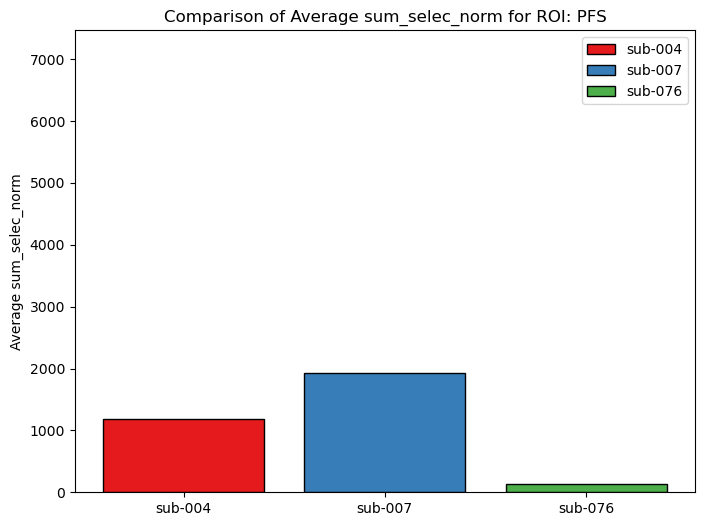

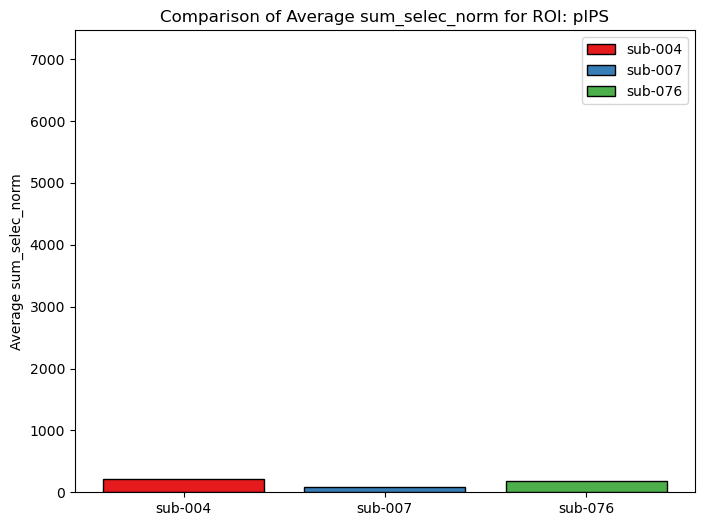

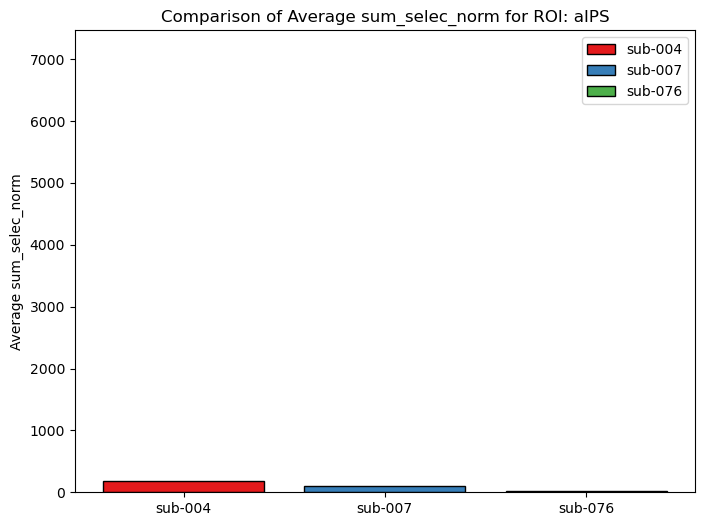

In [46]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Define common y-axis limits
y_axis_min = data['sum_selec_norm'].min()
y_axis_max = data['sum_selec_norm'].max()

# Select individual subjects
subjects = ['sub-004', 'sub-007', 'sub-076']  # Add the subjects you want to select

# Iterate through ROIs
for roi in rois:
    # Filter data for the current ROI
    roi_data = data[data['roi'] == roi]
    
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Iterate through subjects
    for i, subject in enumerate(subjects):
        # Filter data for the current subject
        subject_data = roi_data[roi_data['sub'] == subject]
        
        # Calculate the mean and standard error of sum_selec_norm
        mean_value = subject_data['sum_selec_norm'].mean()
        std_error = subject_data['sum_selec_norm'].sem()
        
        # Plot bar chart with error bars
        plt.bar(i, mean_value, color=palette[i], edgecolor='black', yerr=std_error, capsize=4, label=subject)
    
    # Set x-axis tick labels
    plt.xticks(np.arange(len(subjects)), subjects)
    
    # Set y-axis limits
    plt.ylim(y_axis_min, y_axis_max)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Comparison of Average sum_selec_norm for ROI: {roi}')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()


In [ ]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Define common y-axis limits
y_axis_min = data['sum_selec_norm'].min()
y_axis_max = data['sum_selec_norm'].max()

# Define subject lists
sub_OTC = ['sub-007', 'sub-075', 'sub-076', 'sub-078', 'sub-004', 'sub-079', 'sub-089']  # OTC subject list, sub-004, sub-079, sub-089 are posOTC the rest are anOTC
sub_hemi = ['sub-066', 'sub-069', 'sub-074', 'sub-077', 'sub-090', 'sub-091', 'sub-092', 'sub-hemispace1004', 'sub-hemispace1006', 'sub-hemispace1007']  # Hemi subject list 
sub_control = ['sub-025', 'sub-038', 'sub-057', 'sub-059', 'sub-064', 'sub-067', 'sub-068', 'sub-071', 'sub-083', 'sub-084', 'sub-085', 'sub-087', 'sub-088', 'sub-093', 'sub-094', 'sub-095', 'sub-096', 'sub-097', 'sub-107']  # Control subject list

# Iterate through ROIs
for roi in rois:
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Initialize lists for means and standard errors
    means = []
    errors = []
    
    # Iterate through subject lists
    for subjects in [sub_OTC, sub_hemi, sub_control]:
        # Filter data for the current ROI and subject list
        roi_data = data[(data['roi'] == roi) & (data['sub'].isin(subjects))]
        
        # Calculate the mean and standard error of sum_selec_norm
        mean_value = roi_data['sum_selec_norm'].mean()
        std_error = roi_data['sum_selec_norm'].sem()
        
        # Append means and errors to lists
        means.append(mean_value)
        errors.append(std_error)
    
    # Plot bar chart with error bars
    x = np.arange(3)
    bar_width = 0.2
    plt.bar(x, means, color=palette[:3], edgecolor='black', yerr=errors, capsize=4)
    
    # Set x-axis tick labels
    plt.xticks(x, ['OTC', 'Hemi', 'Control'])
    
    # Set y-axis limits
    #plt.ylim(y_axis_min, y_axis_max)
    plt.ylim(0, 4500)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Average sum_selec_norm for ROI: {roi}')
    
    # Show the plot
    plt.show()

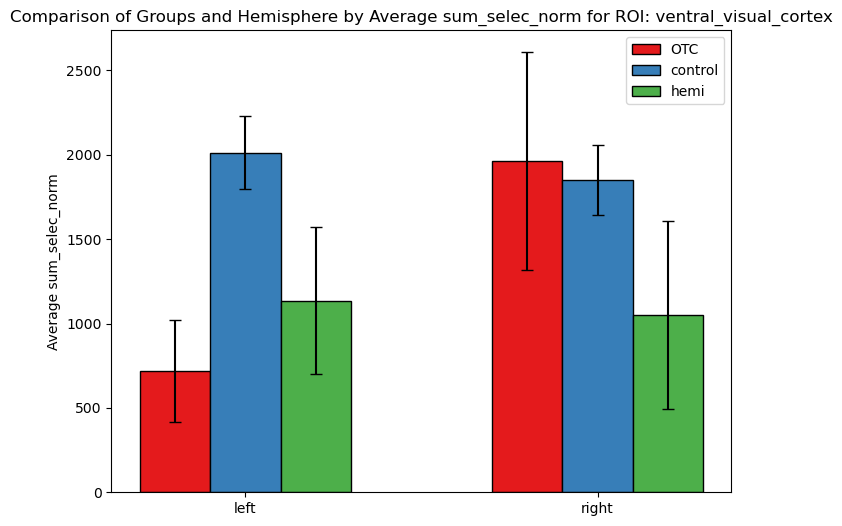

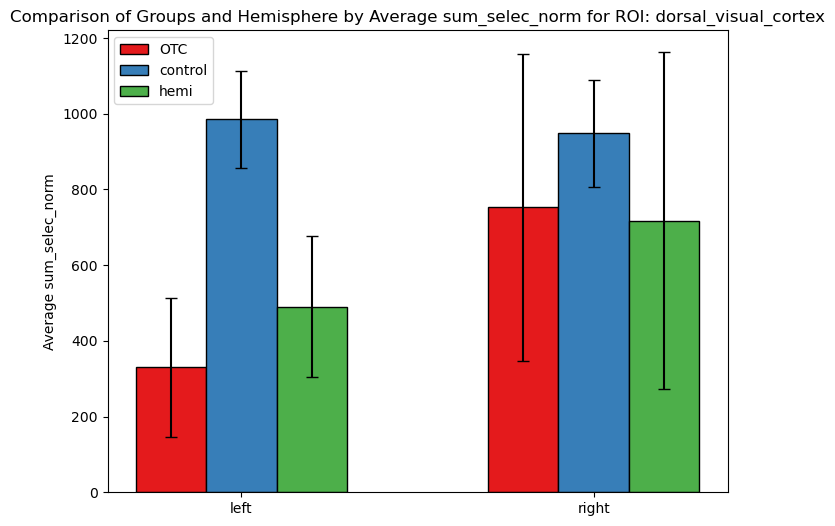

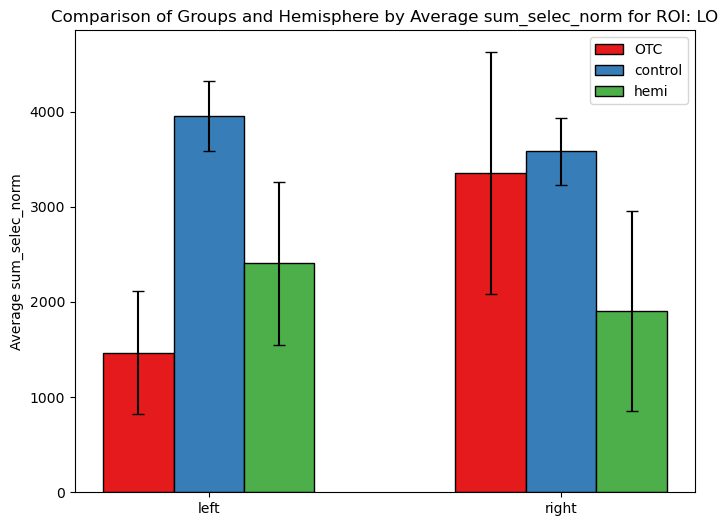

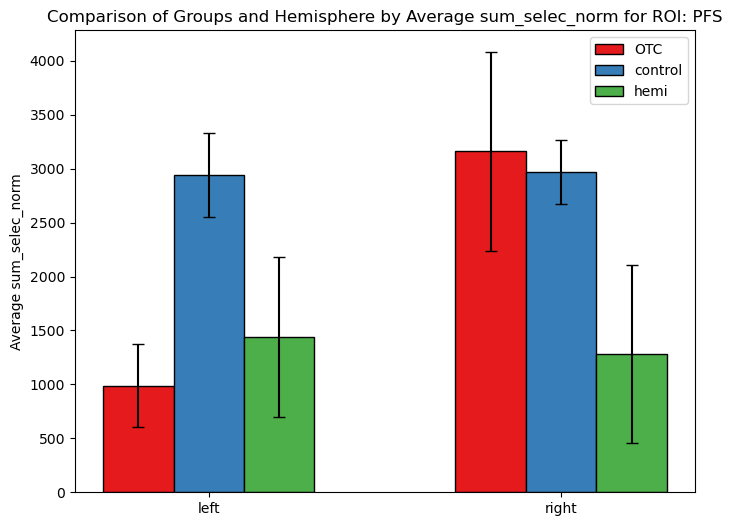

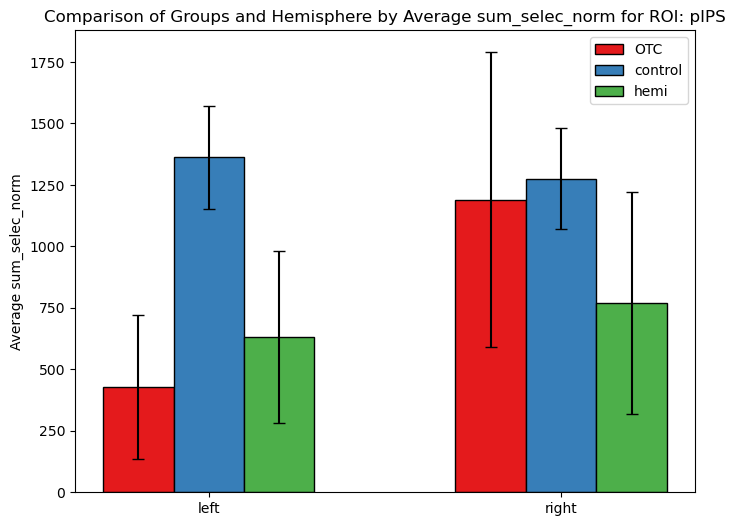

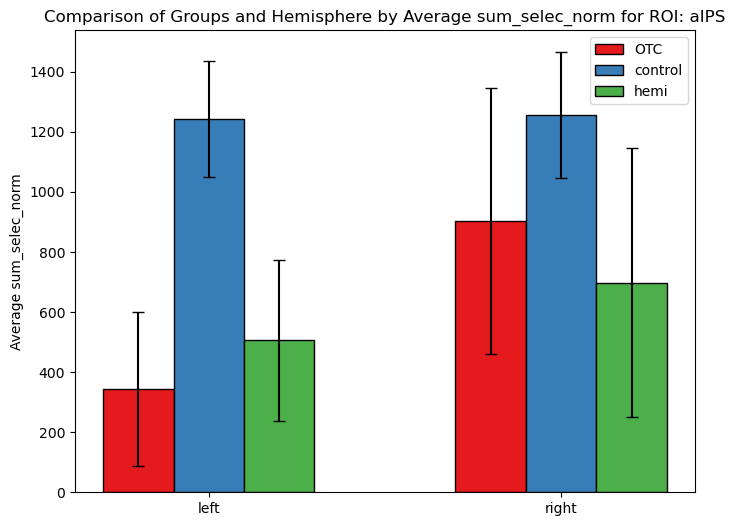

In [75]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary_surgerycolumn.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Iterate through ROIs
for roi in rois:
    # Filter data for the current ROI
    roi_data = data[data['roi'] == roi]
    
    # Calculate the average of sum_selec_norm by group and hemi
    group_hemi_means = roi_data.groupby(['surgery', 'hemi'])['sum_selec_norm'].mean().unstack()
    group_hemi_errors = roi_data.groupby(['surgery', 'hemi'])['sum_selec_norm'].sem().unstack()
    
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Plot bar chart with error bars
    x = np.arange(len(group_hemi_means.columns))
    bar_width = 0.2
    
    for i, group in enumerate(group_hemi_means.index):
        plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)
    
    # Set x-axis tick labels
    plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Comparison of Groups and Hemisphere by Average sum_selec_norm for ROI: {roi}')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

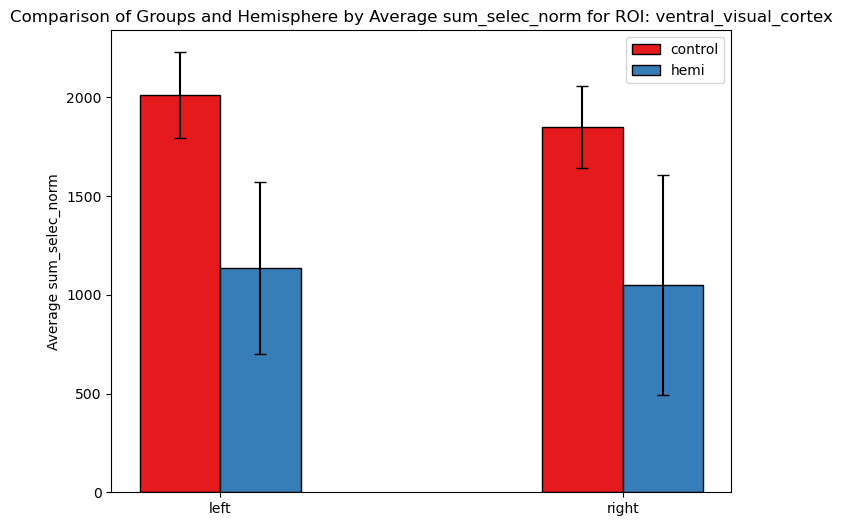

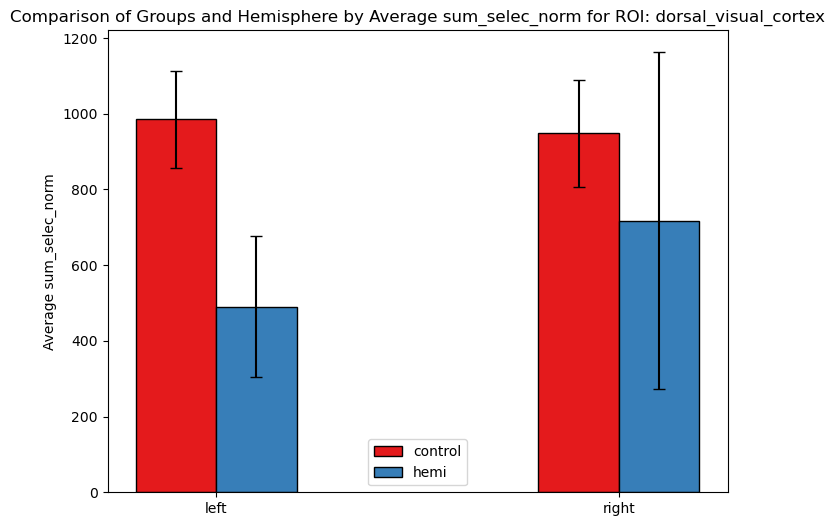

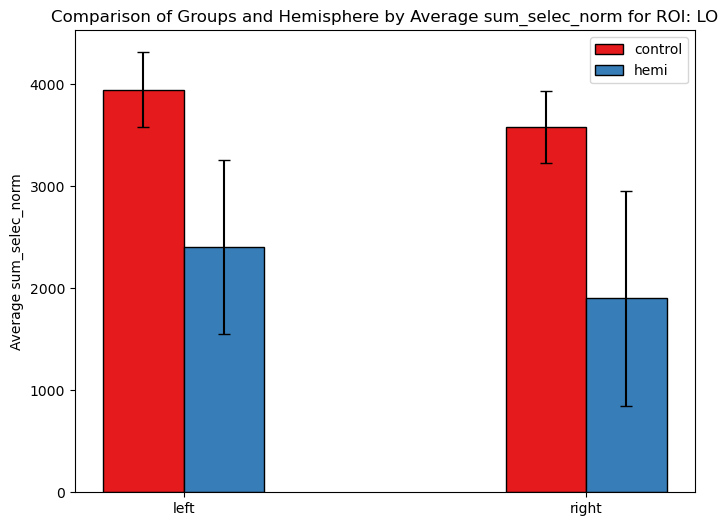

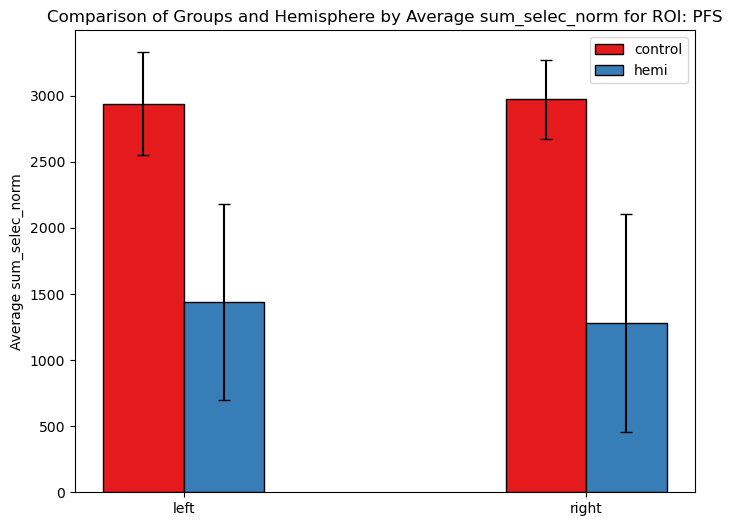

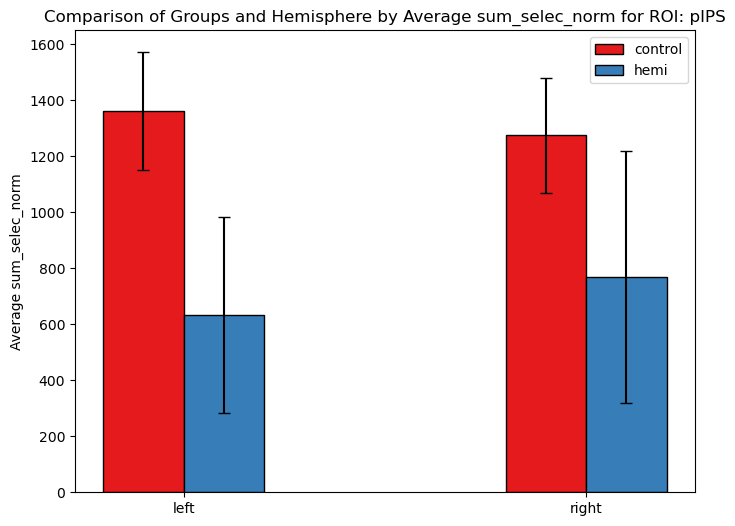

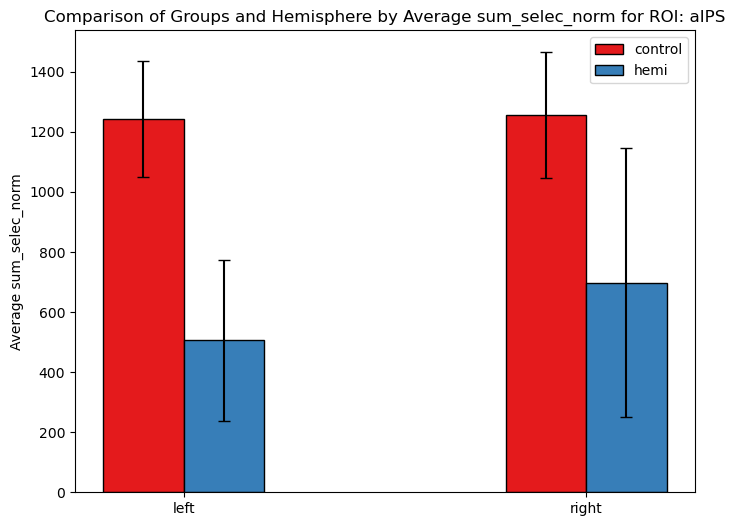

In [76]:
# Load data from CSV file
data = pd.read_csv('/user_data/csimmon2/git_repos/ptoc/results/selectivity/selectivity_summary_hemionly.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Get unique ROIs
rois = data['roi'].unique()

# Set color palette
palette = sns.color_palette('Set1')

# Define colors for left and right hemispheres
left_color = palette[0]
right_color = palette[1]

# Iterate through ROIs
for roi in rois:
    # Filter data for the current ROI
    roi_data = data[data['roi'] == roi]
    
    # Calculate the average of sum_selec_norm by group and hemi
    group_hemi_means = roi_data.groupby(['surgery', 'hemi'])['sum_selec_norm'].mean().unstack()
    group_hemi_errors = roi_data.groupby(['surgery', 'hemi'])['sum_selec_norm'].sem().unstack()
    
    # Set figure size
    plt.figure(figsize=(8, 6))
    
    # Plot bar chart with error bars
    x = np.arange(len(group_hemi_means.columns))
    bar_width = 0.2
    
    for i, group in enumerate(group_hemi_means.index):
        plt.bar(x + i * bar_width, group_hemi_means.loc[group], width=bar_width, color=palette[i], edgecolor='black', yerr=group_hemi_errors.loc[group], capsize=4, label=group)
    
    # Set x-axis tick labels
    plt.xticks(x + (len(group_hemi_means.index) - 1) * bar_width / 2, group_hemi_means.columns)
    
    # Set y-axis label
    plt.ylabel('Average sum_selec_norm')
    
    # Set plot title
    plt.title(f'Comparison of Groups and Hemisphere by Average sum_selec_norm for ROI: {roi}')
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()